# MultiREx - Fixed parameters exploration
#### Planetary transmission spectra generator
##### [GitHub Repository](https://github.com/D4san/MultiREx-public)
<a target="_blank" href="https://colab.research.google.com/github/D4san/MultiREx-public/blob/main/examples/multirex-quickstart.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## External dependencies

If you are working in Google Colab use this to install dependencies. 

In [1]:
import sys 
if 'google.colab' in sys.modules:
    !pip install -Uq multirex
    !mkdir resources/

If you have already reset the Colab session, let's import `MultiREx` and any other package required for this example:

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import multirex as mrex


Loading MultiREx version 0.1.5


## Creating a Base System

Let's start by creating a base system.

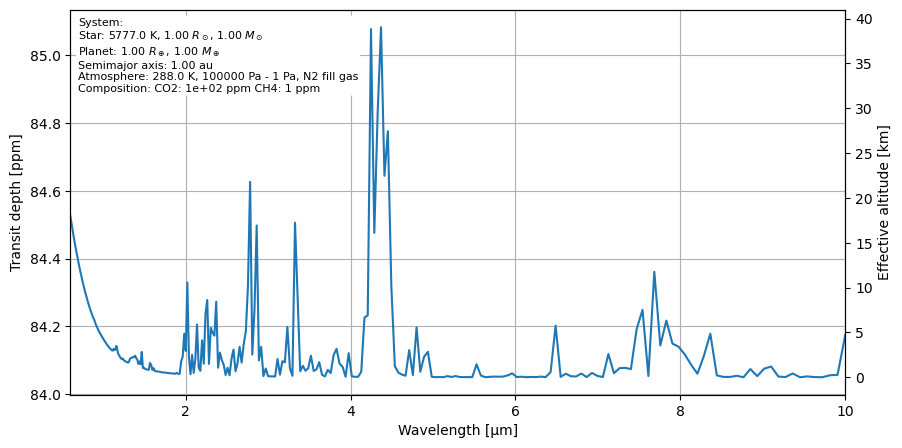

(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='Wavelength [μm]', ylabel='Transit depth [ppm]'>)

In [3]:
system = mrex.System(
    star=mrex.Star(
        temperature=5777,  # Sun-like effective temperature [K]
        radius=1,         # Solar radii
        mass=1            # Solar masses
    ),
    planet=mrex.Planet(
        radius=1,         # Earth radii
        mass=1,           # Earth masses
        atmosphere=mrex.Atmosphere(
            temperature=288,    # Earth-like temperature [K]
            base_pressure=1e5,  # Surface pressure [Pa]
            top_pressure=1,     # Top of atmosphere pressure [Pa]
            fill_gas='N2',
            composition=dict(
                CO2=-4,  # log10(mixing ratio)
                CH4=-6,  # log10(mixing ratio)
            )
        )
    ),
    sma=1  # Semi-major axis [AU]
)

system.make_tm()

wns = mrex.Physics.wavenumber_grid(wl_min=0.6, wl_max=10, resolution=300)

system.plot_spectrum(wn_grid=wns)

## Parameter Space Exploration for a Single Molecule
This section demonstrates how to explore a molecule's parameter space using the `explore_parameter_space` System method.
### Parameter Space Definition
The parameter space is defined as a dictionary where:
- Keys represent the parameters you want to explore
- Values specify the ranges or specific values for each parameter

For example:
1. Star Properties
   - Temperature: `star.temperature` (in Kelvin)
2. Planet Properties
   - Radius: `planet.radius` (in Earth radii)
3. Atmospheric Properties
   - Composition: `atmosphere.composition.H2O` (in volume mixing ratio)
   - Note: `atmosphere.composition` is implemented as a dictionary of molecular species
### Parameter Value Formats
Parameters can be specified in three different formats:
1. Single Value
   ```python
   -2  # Direct numerical value
   ```
2. List of Discrete Values
   ```python
   [200, 400, 1000]  # Specific points to evaluate
   ```
3. Range Dictionary
   ```python
   {
       'min': 200,    # Minimum value
       'max': 1000,   # Maximum value
       'n': 10,       # Number of points
       'distribution': 'log'|'linear'  # Spacing between points
   }
   ```

   > [!NOTE] The rest of parameters will be fixed.

Exploring CH4 parameter space...
Generating observations for 8 spectra...


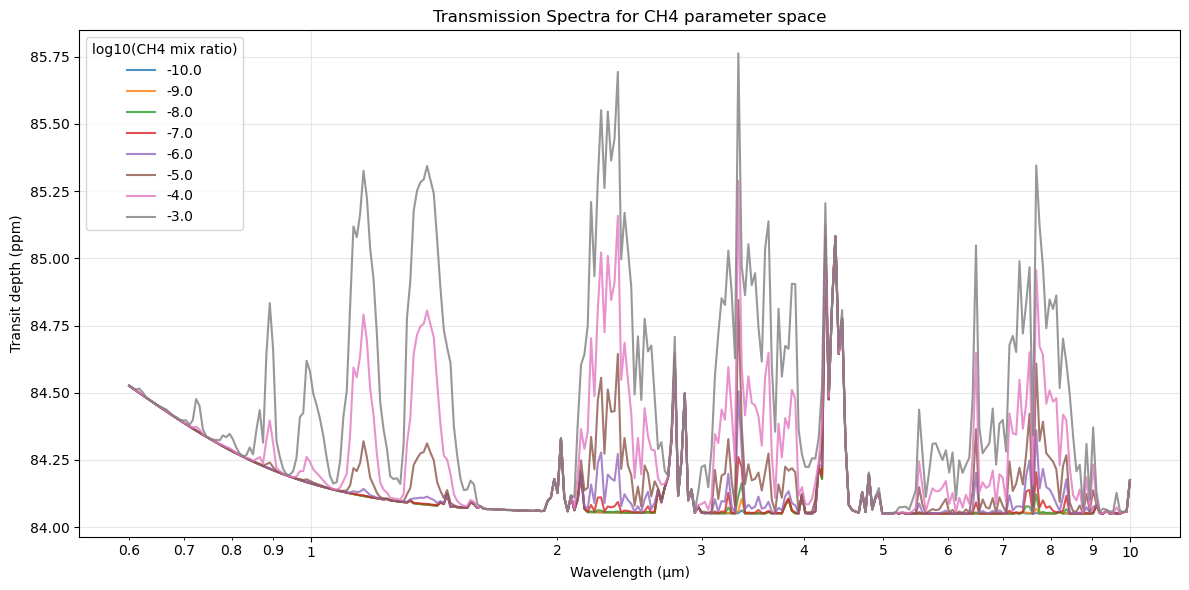

In [4]:
print("Exploring CH4 parameter space...")

parameter_space_ch4 = {
    'planet.atmosphere.composition.CH4': {
        'min': -10,
        'max': -3,
        'n': 8,
        'distribution': 'linear'
    }
}

results_ch4 = system.explore_parameter_space(
    wn_grid=wns,
    parameter_space=parameter_space_ch4,
    snr=20,
    n_observations=1,
    header=True  # to return a dataframe with parameters and spectra
)

spectra_ch4 = results_ch4['spectra']

# Plot spectra for different CH4 concentrations
fig_ch4, ax_ch4 = plt.subplots(figsize=(12, 6))

wavelengths = 1e4 / wns  # Convert wavenumber [cm^-1] to wavelength [μm]
ch4_values = [
    params['atm CH4'] 
    for _, params in spectra_ch4.params.iterrows()
]

for i, (_, spectrum) in enumerate(spectra_ch4.data.iterrows()):
    ch4_value = ch4_values[i]
    ax_ch4.plot(
        wavelengths,
        spectrum * 1e6,
        label=f'{ch4_value:.1f}',
        alpha=0.8
    )

ax_ch4.set_xscale('log')
ax_ch4.set_xlabel('Wavelength (μm)')
ax_ch4.set_ylabel('Transit depth (ppm)')
ax_ch4.set_title('Transmission Spectra for CH4 parameter space')
ax_ch4.legend(title='log10(CH4 mix ratio)')
ax_ch4.grid(True, alpha=0.3)

formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
ax_ch4.xaxis.set_major_formatter(formatter)
formatter = FuncFormatter(lambda y, _: '{:.1g}'.format(y))
ax_ch4.xaxis.set_minor_formatter(formatter)

plt.tight_layout()
plt.show()

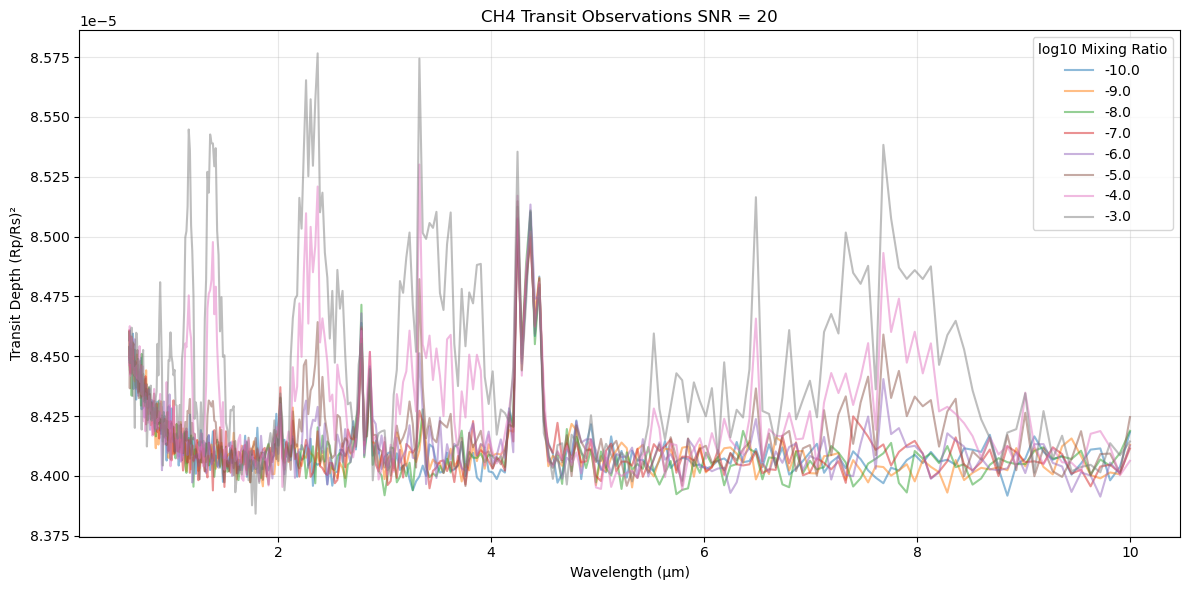

In [5]:
# Display observations data
data = results_ch4["observations"].data
wavelengths = list(results_ch4["observations"].data.columns)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each observation
for i in range(data.shape[0]):
    ch4_value = results_ch4["observations"]["atm CH4"][i]
    ax.plot(
        wavelengths,
        data.iloc[i],
        label=f'{ch4_value:.1f}',
        alpha=0.5
    )

# Customize plot appearance
ax.set_xlabel('Wavelength (μm)')
ax.set_ylabel('Transit Depth (Rp/Rs)²')
ax.set_title('CH4 Transit Observations SNR = 20')
ax.legend(title='log10 Mixing Ratio')
ax.grid(True, alpha=0.3)

# Adjust layout to prevent label clipping
plt.tight_layout()
plt.show()

## Parameter exploration with various `MultiREx` components

You can explore various parameters in the system, obtaining a combination between each of them at the end.


Exploring temperature and CO2 parameter space...


c:\Users\User\anaconda3\Lib\site-packages\taurex\data\profiles\pressure\pressureprofile.py:137: DeprecationWarning: SimplePressureProfile is deprecated. Use LogPressureProfile instead
  warn(
c:\Users\User\anaconda3\Lib\site-packages\taurex\model\transmission.py:80: DeprecationWarning: SimpleForwardModel is deprecated. Use OneDForwardModel instead
  super().__init__(
c:\Users\User\anaconda3\Lib\site-packages\taurex\data\planet.py:136: DeprecationWarning: fullRadius is deprecated, use get_planet_radius(unit='m') instead
  warn(


Generating observations for 9 spectra...


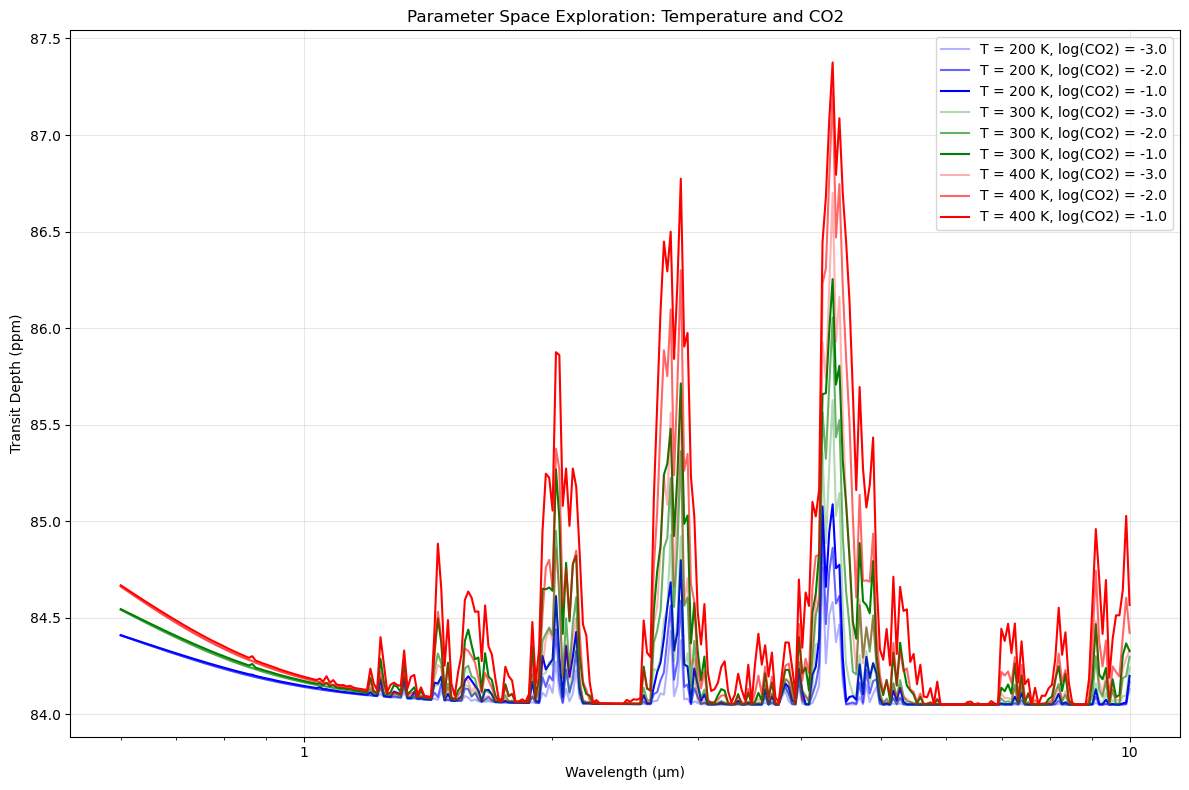

In [6]:
print("Exploring temperature and CO2 parameter space...")


PARAMETER_SPACE_TEMP_CO2 = {
    'planet.atmosphere.temperature': [200, 300, 400],  # List of temperatures
    'planet.atmosphere.composition.CO2': {  # Dictionary for CO2 mixing ratio
        'min': -3,  # Minimum log10(mixing ratio)
        'max': -1,  # Maximum log10(mixing ratio)
        'n': 3,
        'distribution': 'linear'
    }
}

if system.get_params().get("atm CH4"):
    system.planet.atmosphere.remove_gas("CH4")

results_temp_co2 = system.explore_parameter_space(
    wn_grid=wns,
    parameter_space=PARAMETER_SPACE_TEMP_CO2,
    snr=20,
    n_observations=1,
    header=True
)

spectra_temp_co2 = results_temp_co2['spectra']

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot spectra with temperature-based coloring
COLORS = ['b', 'g', 'r']
temperatures = sorted(spectra_temp_co2.params['atm temperature'].unique())
color_dict = dict(zip(temperatures, COLORS))
ALPHAS = [0.3, 0.6, 1]

for idx, (_, params) in enumerate(spectra_temp_co2.params.iterrows()):
    temp = params['atm temperature']
    co2_value = params['atm CO2']
    spectrum = spectra_temp_co2.data.loc[idx]
    
    ax.plot(
        wavelengths,
        spectrum * 1e6,
        label=f'T = {temp:.0f} K, log(CO2) = {co2_value:.1f}',
        color=color_dict[temp],
        alpha=ALPHAS[idx % 3]
    )

# Customize plot appearance
ax.set_xscale('log')
ax.set_ylabel('Transit Depth (ppm)')
ax.set_xlabel('Wavelength (μm)')
ax.set_title('Parameter Space Exploration: Temperature and CO2')
ax.legend()
ax.grid(True, alpha=0.3)

# Format axes
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.16g}'.format(y)))

plt.tight_layout()
plt.show()

### Parallel Processing

Since generating spectra across the entire parameter space quickly scales with the number of parameters, `MultiREx` allows parallel exploration of the parameter space. To achieve this, you only need to specify the number of processors to use with the `n_jobs` parameter in the `explore_parameter_space` function.

In [10]:
import time

system.planet.atmosphere.set_composition({
    "CO2": -2,
    "CH4": -1,
    "H2O": -1
})

parameter_space_parallel = {
    "planet.atmosphere.composition.CO2": {
        "min": -10,
        "max": -1,
        "n": 10
    },
    "planet.atmosphere.composition.H2O": {
        "min": -10,
        "max": -1,
        "n": 10
    },
    "planet.atmosphere.composition.CH4": {
        "min": -10,
        "max": -1,
        "n": 10
    }
}

start_time = time.time()
results = system.explore_parameter_space(
    wn_grid=wns,
    parameter_space=parameter_space_parallel,
    snr=20,
    n_observations=1000,
    header=True,
    n_jobs=-1
)

parallel_time = time.time() - start_time
results['spectra'].params.describe()

Generating observations for 1000 spectra...


,sma,seed,p_radius,p_mass,p_seed,atm temperature,atm base_pressure,atm top_pressure,atm seed,atm CO2,atm CH4,atm H2O,s temperature,s radius,s mass,s seed
count,1000.0,1.000000e+03,1000.0,1000.0,1.000000e+03,1000.0,1000.0,1000.0,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1.000000e+03
mean,1.0,1.742360e+09,1.0,1.0,1.742360e+09,288.0,100000.0,1.0,1.742360e+09,-5.500000,-5.500000,-5.500000,5777.0,1.0,1.0,1.742360e+09
std,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2.873719,2.873719,2.873719,0.0,0.0,0.0,0.000000e+00
min,1.0,1.742360e+09,1.0,1.0,1.742360e+09,288.0,100000.0,1.0,1.742360e+09,-10.000000,-10.000000,-10.000000,5777.0,1.0,1.0,1.742360e+09
25%,1.0,1.742360e+09,1.0,1.0,1.742360e+09,288.0,100000.0,1.0,1.742360e+09,-8.000000,-8.000000,-8.000000,5777.0,1.0,1.0,1.742360e+09
50%,1.0,1.742360e+09,1.0,1.0,1.742360e+09,288.0,100000.0,1.0,1.742360e+09,-5.500000,-5.500000,-5.500000,5777.0,1.0,1.0,1.742360e+09
75%,1.0,1.742360e+09,1.0,1.0,1.742360e+09,288.0,100000.0,1.0,1.742360e+09,-3.000000,-3.000000,-3.000000,5777.0,1.0,1.0,1.742360e+09
max,1.0,1.742360e+09,1.0,1.0,1.742360e+09,288.0,100000.0,1.0,1.742360e+09,-1.000000,-1.000000,-1.000000,5777.0,1.0,1.0,1.742360e+09


In [9]:
t = time.time()
results = system.explore_parameter_space(
    wn_grid=wns,
    parameter_space=parameter_space_parallel,
    snr=20,
    n_observations=1000,
    header=True,
    n_jobs = 1,
)
sequential_time = time.time() - t

c:\Users\User\anaconda3\Lib\site-packages\taurex\data\profiles\pressure\pressureprofile.py:137: DeprecationWarning: SimplePressureProfile is deprecated. Use LogPressureProfile instead
  warn(
c:\Users\User\anaconda3\Lib\site-packages\taurex\model\transmission.py:80: DeprecationWarning: SimpleForwardModel is deprecated. Use OneDForwardModel instead
  super().__init__(
c:\Users\User\anaconda3\Lib\site-packages\taurex\data\planet.py:136: DeprecationWarning: fullRadius is deprecated, use get_planet_radius(unit='m') instead
  warn(


Generating observations for 1000 spectra...


In [11]:
print("Total number of spectra: ", len(results["spectra"]))

# Create DataFrames with value counts for spectra
spectra_ch4 = results["spectra"].params[["atm CH4"]].value_counts()
spectra_co2 = results["spectra"].params[["atm CO2"]].value_counts()
spectra_h2o = results["spectra"].params[["atm H2O"]].value_counts()

# Combine into a single DataFrame for spectra
spectra_counts = pd.concat([spectra_ch4, spectra_co2, spectra_h2o], axis=1)
spectra_counts.columns = ['CH4', 'CO2', 'H2O']
print("\nSpectra parameter counts:")
print(spectra_counts)

print("\n" + "----"*10)

print("\nTotal number of observations: ", len(results["observations"]))

# Create DataFrames with value counts for observations
obs_ch4 = results["observations"].params[["atm CH4"]].value_counts()
obs_co2 = results["observations"].params[["atm CO2"]].value_counts()
obs_h2o = results["observations"].params[["atm H2O"]].value_counts()

# Combine into a single DataFrame for observations
obs_counts = pd.concat([obs_ch4, obs_co2, obs_h2o], axis=1)
obs_counts.columns = ['CH4', 'CO2', 'H2O']
print("\nObservation parameter counts:")
print(obs_counts)

print("\n" + "----"*10)
print(f"Time taken:\nSequential: {sequential_time}\nParallel: {parallel_time}")


Total number of spectra:  1000

Spectra parameter counts:
       CH4  CO2  H2O
-10.0  100  100  100
-9.0   100  100  100
-8.0   100  100  100
-7.0   100  100  100
-6.0   100  100  100
-5.0   100  100  100
-4.0   100  100  100
-3.0   100  100  100
-2.0   100  100  100
-1.0   100  100  100

----------------------------------------

Total number of observations:  1000000

Observation parameter counts:
          CH4     CO2     H2O
-10.0  100000  100000  100000
-9.0   100000  100000  100000
-8.0   100000  100000  100000
-7.0   100000  100000  100000
-6.0   100000  100000  100000
-5.0   100000  100000  100000
-4.0   100000  100000  100000
-3.0   100000  100000  100000
-2.0   100000  100000  100000
-1.0   100000  100000  100000

----------------------------------------
Time taken:
Sequential: 87.17826914787292
Parallel: 23.5948007106781
